### q-1 Without using any deep learning library, Implement the forward pass of neural network shown in figure 1. Take filter weights as gaussian or random filter and pooling operation as max-pooling. Initialize the weights randomly and show output after each layer for any sample image.

In [156]:
import numpy as np
from PIL import Image
from scipy.special import expit
import random
from matplotlib import pyplot as plt

In [157]:
def sigmoid(x):
    return 1 / (1+expit(-x))

In [158]:
def softmax(a):
    expScores = expit(a)
    probs = expScores/np.sum(expScores)
    return probs

In [159]:
def relu(a):
    a[a<=0] = 0
    return a

In [160]:
def show_image(a,n):   
    for i in xrange(n):
#         plt.figure()
        plt.figure(figsize=(1,1))
        plt.imshow(a[i], cmap=plt.cm.binary)

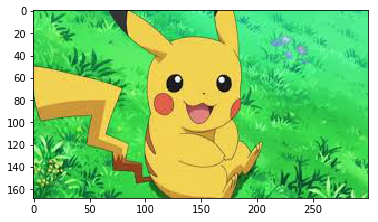

In [161]:
img = Image.open("../input_data/pikachu.jpeg",'r')
plt.imshow(np.asarray(img))

#### resize image to 32x32

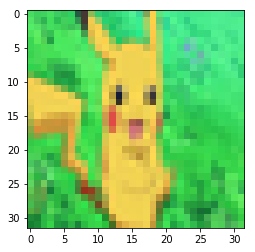

In [162]:
img = img.resize((32,32), Image.ANTIALIAS)
arr_img = np.asarray(img)
plt.imshow(arr_img)

#### creating random filters for 1st convolution and applying it

In [163]:
c1_filter = np.random.randint(-7,10,(6,5,5))

Images after applying 1st convolution


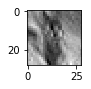

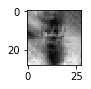

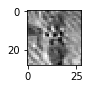

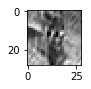

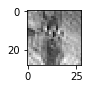

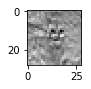

In [164]:
img_after_c1 = np.zeros((6,28,28))
for i in xrange(6):
    for j in xrange(28):
        for k in xrange(28):
            img_after_c1[i,j,k] = np.sum(np.multiply(arr_img[j:j+5,k:k+5,:].T, c1_filter[i]))

print "Images after applying 1st convolution"
show_image(img_after_c1,6)            

In [165]:
img_after_c1 = relu(img_after_c1)
# print "Images after applying relu"
# show_image(img_after_c1,6)
print img_after_c1.shape

(6, 28, 28)


#### 1st pooling operation

Images after 1st pooling
(6, 14, 14)


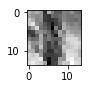

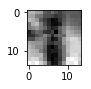

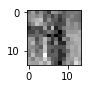

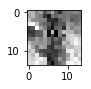

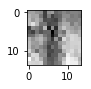

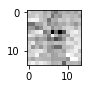

In [166]:
img_after_s2 = np.zeros((6,14,14))

for i in xrange(6):
    for j in xrange(0,28,2):
        for k in xrange(0,28,2):
            img_after_s2[i,j/2,k/2] = np.max(img_after_c1[i,j:j+2,k:k+2])
            
print "Images after 1st pooling"
show_image(img_after_s2,6)
print img_after_s2.shape

#### creating random filters for 1st convolution and applying it

Images after 2nd convolution


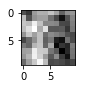

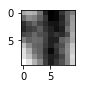

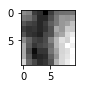

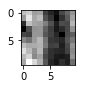

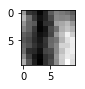

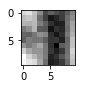

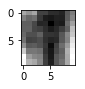

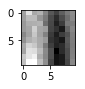

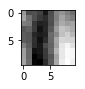

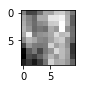

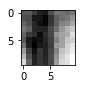

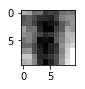

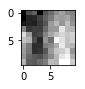

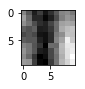

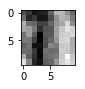

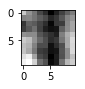

In [167]:
c2_filter = np.random.randint(-7,10,(16,5,5))
img_after_c2 = np.zeros((16,10,10))

for i in xrange(16):
    for j in xrange(10):
        for k in xrange(10):
            img_after_c2[i,j,k] = np.sum(np.multiply(img_after_s2[:,j:j+5,k:k+5],c2_filter[i]))

print "Images after 2nd convolution"
show_image(img_after_c2,16)            

In [168]:
img_after_c2 = relu(img_after_c2)
# print "Images after applying relu"
# show_image(img_after_c2,16)
print img_after_c2.shape

(16, 10, 10)


#### 2nd pooling

Images after 2nd pooling
(16, 5, 5)


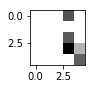

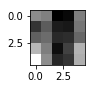

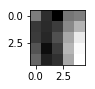

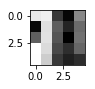

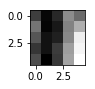

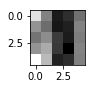

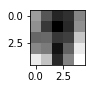

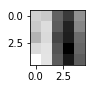

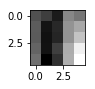

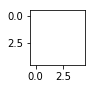

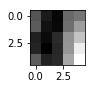

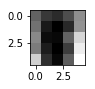

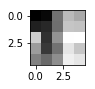

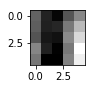

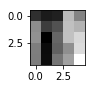

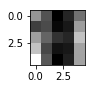

In [169]:
img_after_s4 = np.zeros((16,5,5))

for i in xrange(16):
    for j in xrange(0,10,2):
        for k in xrange(0,10,2):
            img_after_s4[i,j/2,k/2] = np.max(img_after_c2[i,j:j+2,k:k+2])
            
print "Images after 2nd pooling"
show_image(img_after_s4,16)
print img_after_s4.shape

In [170]:
one_d_image = img_after_s4.copy()
one_d_image.resize((120,1))


#### feed forward of neural network

In [171]:
def nn_forward_pass(one_d_image):
    w_input_hid = np.random.randn(120,84)
    w_hid_out = np.random.randn(84,10)
    hid_in = np.dot(one_d_image.T,w_input_hid)
    hid_out = sigmoid(hid_in)
    out_in = np.dot(hid_out,w_hid_out)
    out_out = sigmoid(out_in)

    prob = softmax(out_out.T)

    maxi = -1
    ind = -1
    for i in xrange(len(prob)):
        if prob[i]>maxi:
            maxi=prob[i]
            ind = i+1

    return prob, ind

In [172]:
prob, label = nn_forward_pass(one_d_image)
print prob
print "\nclass: ",label

[[0.10537663]
 [0.10716751]
 [0.09436864]
 [0.10541567]
 [0.09251916]
 [0.09386617]
 [0.09131809]
 [0.0955913 ]
 [0.1071609 ]
 [0.10721592]]

class:  10
